# main library

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFromModel, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier 
import numpy as np
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# feature selection

In [2]:
dc=pd.read_csv("feature_selection.csv" , sep = "," , encoding = "utf-8")

In [3]:
X= dc.iloc[:, :-1] 
  
y= dc.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

feature importance

C:\Users\Ahmed fawzi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


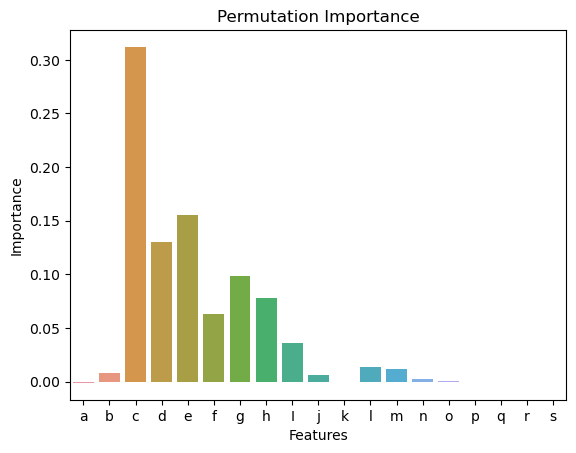

In [4]:
model = LogisticRegression() 
model.fit(X_train, y_train)
perm_importance = permutation_importance(model, X_train, y_train)
sns.barplot(x=X_train.columns, y=perm_importance.importances_mean)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance')
plt.show()

Features: 1159/1159


Comparison of Feature Selection Techniques:

                          Technique  Accuracy  \
0                        Chi-Square  0.578035   
1                      ANOVA F-test  0.734104   
2                  Information Gain  0.734104   
3         Forward Feature Selection  0.736994   
4        Backward Feature Selection  0.736994   
5                               RFE  0.592486   
6      Exhaustive Feature Selection  0.731214   
7           Lasso Feature Selection  0.751445   
8      ElasticNet Feature Selection  0.765896   
9                 L2 Regularization  0.760116   
10  Random Forest Feature Selection  0.612717   

                       Selected Features  
0                                 [c, p]  
1                                 [c, d]  
2                                 [c, d]  
3                                 [c, e]  
4                                 [c, e]  
5                                 [o, p]  
6                              [c, d, e]  
7   [b, c, d, e, f, g

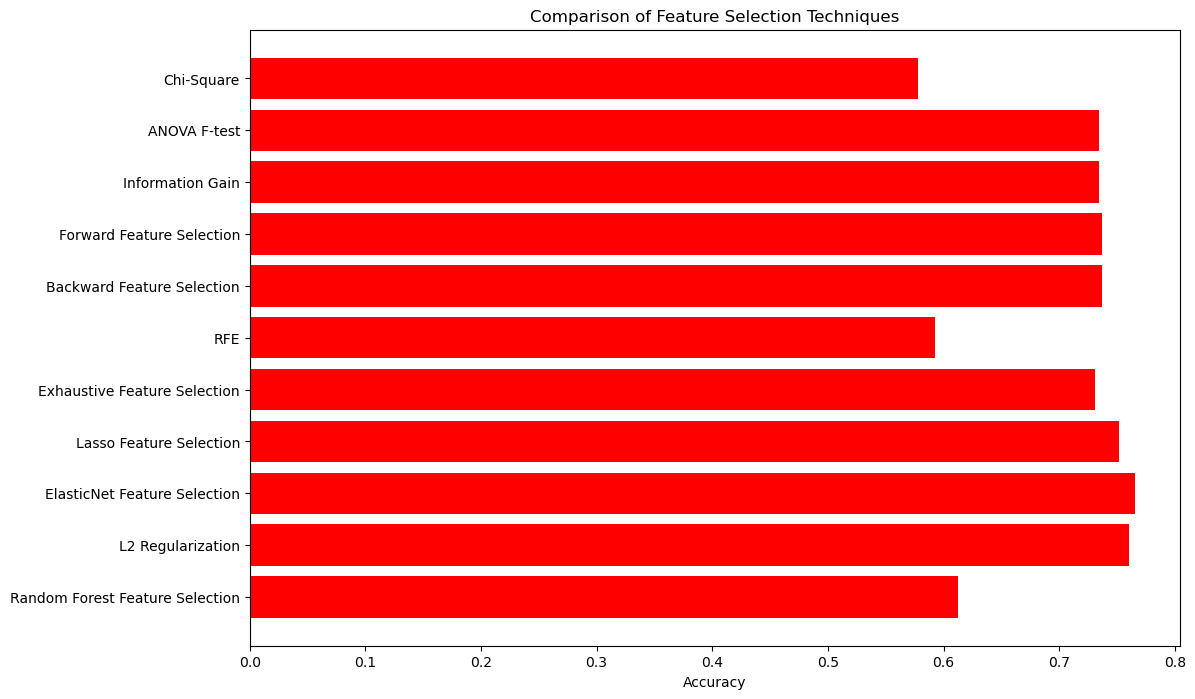

In [5]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFromModel, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)



# Chi-Square Feature Selection
chi2_selector = Pipeline([
    ('scaler', MinMaxScaler()),  # Scaling the data to make all values non-negative
    ('feature_selection', SelectKBest(chi2, k=2)),
    ('clf', LogisticRegression(max_iter=200))
])
chi2_selector.fit(X_train, y_train)
chi2_selected_features = chi2_selector.named_steps['feature_selection'].get_support(indices=True)
chi2_accuracy = accuracy_score(y_test, chi2_selector.predict(X_test))

# ANOVA F-test Feature Selection
anova_selector = Pipeline([
    ('feature_selection', SelectKBest(f_classif, k=2)),
    ('clf', LogisticRegression(max_iter=200))
])
anova_selector.fit(X_train, y_train)
anova_selected_features = anova_selector.named_steps['feature_selection'].get_support(indices=True)
anova_accuracy = accuracy_score(y_test, anova_selector.predict(X_test))

# Information Gain Feature Selection
info_gain_selector = Pipeline([
    ('feature_selection', SelectKBest(mutual_info_classif, k=2)),
    ('clf', LogisticRegression(max_iter=200))
])
info_gain_selector.fit(X_train, y_train)
info_gain_selected_features = info_gain_selector.named_steps['feature_selection'].get_support(indices=True)
info_gain_accuracy = accuracy_score(y_test, info_gain_selector.predict(X_test))

# Forward Feature Selection
forward_selector = SFS(LogisticRegression(max_iter=200),
                       k_features=2,
                       forward=True,
                       floating=False,
                       scoring='accuracy',
                       cv=5)
forward_selector.fit(X_train, y_train)
forward_features = list(forward_selector.k_feature_idx_)
forward_model = LogisticRegression(max_iter=200)
forward_model.fit(X_train.iloc[:, forward_features], y_train)
forward_predictions = forward_model.predict(X_test.iloc[:, forward_features])
forward_accuracy = accuracy_score(y_test, forward_predictions)

# Backward Feature Selection
backward_selector = SFS(LogisticRegression(max_iter=200),
                        k_features=2,
                        forward=False,
                        floating=False,
                        scoring='accuracy',
                        cv=5)
backward_selector.fit(X_train, y_train)
backward_features = list(backward_selector.k_feature_idx_)
backward_model = LogisticRegression(max_iter=200)
backward_model.fit(X_train.iloc[:, backward_features], y_train)
backward_predictions = backward_model.predict(X_test.iloc[:, backward_features])
backward_accuracy = accuracy_score(y_test, backward_predictions)

# Recursive Feature Elimination (RFE)
rfe_selector = Pipeline([
    ('feature_selection', RFE(estimator=LogisticRegression(max_iter=200), n_features_to_select=2)),
    ('clf', LogisticRegression(max_iter=200))
])
rfe_selector.fit(X_train, y_train)
rfe_selected_features = rfe_selector.named_steps['feature_selection'].get_support(indices=True)
rfe_accuracy = accuracy_score(y_test, rfe_selector.predict(X_test))

# Exhaustive Feature Selection
exhaustive_selector = EFS(LogisticRegression(max_iter=200),
                          min_features=1,
                          max_features=3,
                          scoring='accuracy',
                          cv=5)
exhaustive_selector.fit(X_train, y_train)
exhaustive_features = list(exhaustive_selector.best_idx_)
exhaustive_model = LogisticRegression(max_iter=200)
exhaustive_model.fit(X_train.iloc[:, exhaustive_features], y_train)
exhaustive_predictions = exhaustive_model.predict(X_test.iloc[:, exhaustive_features])
exhaustive_accuracy = accuracy_score(y_test, exhaustive_predictions)

# Lasso Feature Selection
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
model_importance = SelectFromModel(lasso, prefit=True)
X_new_train = model_importance.transform(X_train)
X_new_test = model_importance.transform(X_test)
lasso_selected_features = model_importance.get_support(indices=True)
lasso_selector = LogisticRegression(max_iter=200)
lasso_selector.fit(X_new_train, y_train)
lasso_predictions = lasso_selector.predict(X_new_test)
lasso_accuracy = accuracy_score(y_test, lasso_predictions)

# ElasticNet Feature Selection
elastic_net = ElasticNetCV(cv=5, random_state=42).fit(X_train, y_train)
model_importance_enet = SelectFromModel(elastic_net, prefit=True)
X_new_train_enet = model_importance_enet.transform(X_train)
X_new_test_enet = model_importance_enet.transform(X_test)
enet_selected_features = model_importance_enet.get_support(indices=True)
elastic_net_selector = LogisticRegression(max_iter=200)
elastic_net_selector.fit(X_new_train_enet, y_train)
elastic_net_predictions = elastic_net_selector.predict(X_new_test_enet)
enet_accuracy = accuracy_score(y_test, elastic_net_predictions)

# L2 Regularization (Ridge)
ridge_selector = Pipeline([
    ('clf', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200))
])
ridge_selector.fit(X_train, y_train)
ridge_accuracy = accuracy_score(y_test, ridge_selector.predict(X_test))

# Random Forest Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:2]
rf_model = LogisticRegression(max_iter=200)
rf_model.fit(X_train.iloc[:, indices], y_train)
rf_predictions = rf_model.predict(X_test.iloc[:, indices])
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Collecting results
results = {
    'Technique': [
        'Chi-Square', 'ANOVA F-test', 'Information Gain', 
        'Forward Feature Selection', 'Backward Feature Selection', 
        'RFE', 'Exhaustive Feature Selection', 'Lasso Feature Selection', 
        'ElasticNet Feature Selection', 'L2 Regularization', 
        'Random Forest Feature Selection'
    ],
    'Accuracy': [
        chi2_accuracy, anova_accuracy, info_gain_accuracy, 
        forward_accuracy, backward_accuracy, rfe_accuracy, 
        exhaustive_accuracy, lasso_accuracy, enet_accuracy, 
        ridge_accuracy, rf_accuracy
    ],
    'Selected Features': [
        list(X.columns[chi2_selected_features]), list(X.columns[anova_selected_features]), 
        list(X.columns[info_gain_selected_features]), list(X.columns[forward_features]), 
        list(X.columns[backward_features]), list(X.columns[rfe_selected_features]), 
        list(X.columns[exhaustive_features]), list(X.columns[lasso_selected_features]),
        list(X.columns[enet_selected_features]), 'All Features', list(X.columns[indices])
    ]
}

results_df = pd.DataFrame(results)

print("\nComparison of Feature Selection Techniques:\n")
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.barh(results_df['Technique'], results_df['Accuracy'], color='red')
plt.xlabel('Accuracy')
plt.title('Comparison of Feature Selection Techniques')
plt.gca().invert_yaxis()  
plt.show()


# factor analysis

In [6]:
data=pd.read_csv("vg2.csv" , sep = "," , encoding = "utf-8")

Factor Loadings:
 [[-3.13817380e-03  5.51997356e-04 -3.21762755e-02]
 [ 1.95479600e-02  1.65501662e-01  3.43101021e-02]
 [-6.95689237e-02  9.91975813e-01 -8.53198746e-02]
 [ 1.06390719e-02 -1.15436906e-01  4.63070376e-02]
 [ 1.13916671e-02  2.90274957e-02 -6.08500377e-02]
 [ 8.19632210e-01 -1.12037456e-02  4.65663695e-02]
 [ 7.69574495e-01  8.50841585e-02  2.97332964e-01]
 [ 4.24574616e-01 -1.18314048e-01 -2.84453924e-01]
 [ 3.22124505e-01  7.51100490e-02  4.03436057e-01]
 [ 1.02235467e+00 -3.86055487e-03 -1.17769929e-02]]
Factor Scores:
 [[17.91555603 -1.73200956 -3.67049387]
 [16.18027066 -2.37765567 -6.90258218]
 [15.60001358 -2.28627912 -3.06317507]
 ...
 [-0.30397563  0.26400796  0.08522992]
 [-0.27450373  0.60729706 -0.02062631]
 [-0.29997184 -0.59297021  0.04669322]]
Factor Variance:
 (array([2.5987535 , 1.05259487, 0.34972775]), array([0.25987535, 0.10525949, 0.03497277]), array([0.25987535, 0.36513484, 0.40010761]))


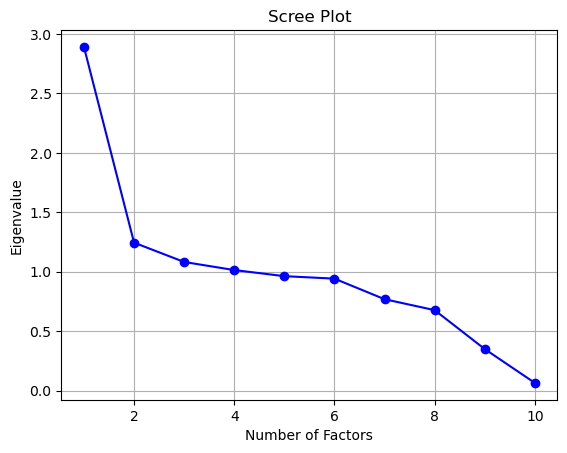

In [7]:

columns_of_interest = data.columns
data_subset = data[columns_of_interest]

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)


fa = FactorAnalyzer(n_factors=3, rotation='varimax')


fa.fit(data_standardized)

loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Get factor scores
factor_scores = fa.transform(data_standardized)
print("Factor Scores:\n", factor_scores)

# Check the factor variance
factor_variance = fa.get_factor_variance()
print("Factor Variance:\n", factor_variance)

ev, _ = fa.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, 'o-', color='b')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()
